In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np 
import rasterio as rs
from rasterio.plot import show
from pyproj import CRS
import geopy
import rioxarray


from matplotlib import pyplot as plt
%matplotlib inline

/home/arfa/.local/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
shapefile = gpd.read_file("./DTM/DHMVII_vdc_k01.shp")
shapefile

,Id,OpnDatum1,OpnDatum2,geometry
0,0,2013-02-20,None,"MULTIPOLYGON Z (((162079.010 238604.770 0.000,..."
1,0,2013-04-01,None,"POLYGON Z ((148803.300 243432.780 0.000, 14882..."
2,0,2013-02-20,2013-04-01,"MULTIPOLYGON Z (((156554.470 243736.800 0.000,..."


In [3]:
shapefile.crs

<Projected CRS: PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["B ...>
Name: Belge 1972 / Belgian Lambert 72
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

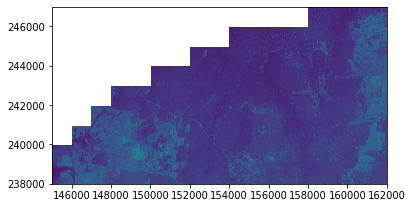

<AxesSubplot:>

In [4]:
dsm = rs.open(r'DSM_k01.tif')
show(dsm)

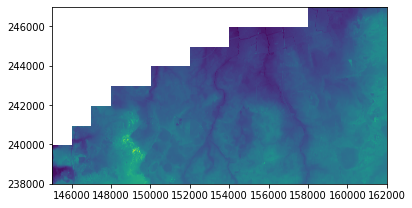

<AxesSubplot:>

In [5]:
dtm = rs.open(r'DTM_k01.tif')
show(dtm)

In [6]:
dsm_array = dsm.read(1)
dtm_array = dtm.read(1)

In [7]:
chm_array = dsm_array - dtm_array

In [8]:
chm_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02000046],
       [0.        , 0.        , 0.        , ..., 0.01000023, 0.        ,
        0.01000023]], dtype=float32)

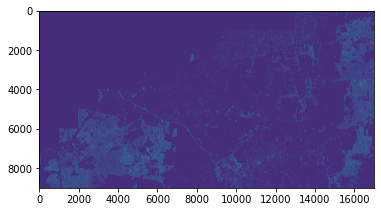

<AxesSubplot:>

In [9]:
show(chm_array)

In [13]:
slice_ar = chm_array[8000:8010,10100:10120]
slice_ar

#import earthpy as et
#import earthpy.plot as ep
#ep.plot_bands(slice_ar,cmap='viridis')
#plt.show()

array([[ 1.94200020e+01,  1.27099991e+01,  1.80900002e+01,
         1.94200001e+01,  1.51699991e+01,  1.66399994e+01,
         2.13500023e+01,  1.26700001e+01,  2.21800003e+01,
         1.88699989e+01,  2.27599983e+01,  2.48900013e+01,
         2.40200005e+01,  2.08600006e+01,  1.76500015e+01,
         2.16500015e+01,  1.53700008e+01,  1.25799999e+01,
         1.63600006e+01,  1.48200006e+01],
       [ 9.08999920e+00,  1.18899994e+01,  1.47700005e+01,
         2.18499985e+01,  2.08899994e+01,  1.89400024e+01,
         2.00799980e+01,  1.91599998e+01,  2.08600006e+01,
         2.13899994e+01,  2.55799999e+01,  7.22999954e+00,
         2.57900009e+01,  2.18999977e+01,  1.95699997e+01,
         1.59300003e+01,  1.57799988e+01,  2.69999886e+00,
         1.47499990e+01,  1.72799988e+01],
       [ 1.93699989e+01,  1.21399994e+01,  2.27399998e+01,
         1.22600002e+01,  2.15100002e+01,  1.20699997e+01,
         1.86100006e+01,  2.01300011e+01,  2.04099998e+01,
         2.16899986e+01,  2.5

In [15]:
nx = slice_ar.shape[1]
ny = slice_ar.shape[0]
x = range(nx)
y = range(ny)

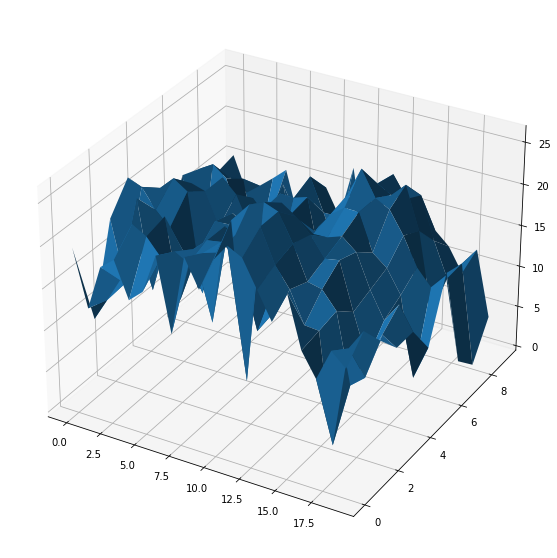

In [16]:
size = plt.figure(figsize = (10,10))
ha = size.add_subplot(111, projection = "3d")

X,Y = np.meshgrid(x,y)
ha.plot_surface(X, Y, slice_ar)
plt.show()

In [15]:
dsm.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [16]:
dsm.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 17000,
 'height': 9000,
 'count': 1,
 'crs': CRS.from_epsg(31370),
 'transform': Affine(1.0, 0.0, 145000.0,
        0.0, -1.0, 247000.0)}

In [12]:
import rioxarray as rx

In [13]:
surface = rx.open_rasterio("DHMVIIDSMRAS1m_k01.tif")
surface

<xarray.DataArray (band: 1, y: 9000, x: 17000)>
[153000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  98.559997558594
    STATISTICS_MEAN:     15.598165931673
    STATISTICS_MINIMUM:  -3.25
    STATISTICS_STDDEV:   7.0595914207194
    _FillValue:          -9999.0
    scale_factor:        1.0
    add_offset:          0.0

In [11]:
surface.rio.crs

CRS.from_epsg(31370)

In [12]:
surface.rio.bounds()

(145000.0, 238000.0, 162000.0, 247000.0)

In [13]:
surface.values

array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,
          1.279e+01,  1.280e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,
          1.281e+01,  1.284e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,
          1.283e+01,  1.288e+01],
        ...,
        [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,
          1.693e+01,  1.690e+01],
        [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,
          1.691e+01,  1.695e+01],
        [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,
          1.688e+01,  1.691e+01]]], dtype=float32)

In [14]:
from pyproj import CRS
epsg = surface.rio.crs.to_epsg()
crs = CRS(epsg)
crs

<Projected CRS: EPSG:31370>
Name: BD72 / Belgian Lambert 72
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Belgium - onshore.
- bounds: (2.5, 49.5, 6.4, 51.51)
Coordinate Operation:
- name: Belgian Lambert 72
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [40]:
surface = rioxarray.open_rasterio("DSM/DSM_k06.tif")
terrain = rioxarray.open_rasterio("DTM/DTM_k06.tif")

In [5]:
surface.rio.crs.wkt

'PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["Belge 1972",DATUM["Reseau_National_Belge_1972",SPHEROID["International 1924",6378388,297,AUTHORITY["EPSG","7022"]],AUTHORITY["EPSG","6313"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4313"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",90],PARAMETER["central_meridian",4.36748666666667],PARAMETER["standard_parallel_1",51.1666672333333],PARAMETER["standard_parallel_2",49.8333339],PARAMETER["false_easting",150000.013],PARAMETER["false_northing",5400088.438],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","31370"]]'

In [6]:
terrain.rio.crs.wkt

'PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["Belge 1972",DATUM["Reseau_National_Belge_1972",SPHEROID["International 1924",6378388,297,AUTHORITY["EPSG","7022"]],AUTHORITY["EPSG","6313"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4313"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",90],PARAMETER["central_meridian",4.36748666666667],PARAMETER["standard_parallel_1",51.1666672333333],PARAMETER["standard_parallel_2",49.8333339],PARAMETER["false_easting",150000.013],PARAMETER["false_northing",5400088.438],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","31370"]]'

In [8]:
import rasterio

In [21]:
df = rasterio.open('DSM_k07.tif')
df1 = rasterio.open("DTM_k07.tif")

In [22]:
df.bounds
df1.bounds

BoundingBox(left=130000.0, bottom=218000.0, right=162000.0, top=238000.0)

In [ ]:
BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [17]:
df7 = rasterio.open("DTM_k06.tif")

In [38]:
df7.bounds.left

98000.0

In [23]:
df7.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 32000,
 'height': 9000,
 'count': 1,
 'crs': CRS.from_epsg(31370),
 'transform': Affine(1.0, 0.0, 98000.0,
        0.0, -1.0, 227000.0)}

In [28]:
import requests

In [29]:
address =  "Spijker 29, 2910 Essen"
def details(address: str):
    req = requests.get(f"https://loc.geopunt.be/v4/Location?q={address}").json()
    info = {'address' : address, 
                'x_value' : req['LocationResult'][0]['Location']['X_Lambert72'],
                'y_value' : req['LocationResult'][0]['Location']['Y_Lambert72'],
                'street' : req['LocationResult'][0]['Thoroughfarename'],
                'house_number' : req['LocationResult'][0]['Housenumber'], 
                'postcode': req['LocationResult'][0]['Zipcode'], 
                'municipality' : req['LocationResult'][0]['Municipality']}
    
    detail = requests.get("https://api.basisregisters.vlaanderen.be/v1/adresmatch", 
                          params={"postcode": info['postcode'], 
                                  "straatnaam": info['street'],
                                  "huisnummer": info['house_number']}).json()
    building = requests.get(detail['adresMatches'][0]['adresseerbareObjecten'][0]['detail']).json()
    build = requests.get(building['gebouw']['detail']).json()
    info['polygon'] = [build['geometriePolygoon']['polygon']['coordinates']]
    
    return info

info = details(address)
info


{'address': 'Spijker 29, 2910 Essen',
 'x_value': 157393.34,
 'y_value': 238631.92,
 'street': 'Spijker',
 'house_number': '29',
 'postcode': '2910',
 'municipality': 'Essen',
 'polygon': [[[[157385.82356835902, 238625.82755954564],
    [157398.8194083646, 238626.23434354737],
    [157398.5548323691, 238632.56855155155],
    [157400.88174436986, 238632.57085555047],
    [157400.87611237168, 238638.64675955474],
    [157393.11956836283, 238638.70410355553],
    [157393.09358436614, 238635.6356875524],
    [157386.00827235729, 238635.4543115534],
    [157385.82356835902, 238625.82755954564]]]]}

In [37]:
x = info["x_value"]
y = info["y_value"]

157393.34
